# Loading Libraries and Datasets

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn.impute import KNNImputer
import nltk
import collections
import pickle

In [2]:
with open('untokenized_clean_souped_untokenized_stemmed_filtered_body.pk', 'rb') as file:
    untokenized_clean_souped_untokenized_stemmed_filtered_body = pickle.load(file)

In [3]:
with open('clean_souped_untokenized_stemmed_filtered_body.pk', 'rb') as file:
    clean_souped_untokenized_stemmed_filtered_body = pickle.load(file)

In [4]:
with open('tf_idf_df.pk', 'rb') as file:
    tf_idf_df = pickle.load(file)

In [5]:
with open('feature_names.pk', 'rb') as file:
    feature_names = pickle.load(file)

In [6]:
raw_data =  pd.read_csv('C:\\Ali\\Formaton machine learning\\rawdatas.csv', index_col = 0, low_memory = False)

In [7]:
raw_data = raw_data[0:50000]
raw_data.shape

(50000, 23)

# Apprentissage supervisé 

## LDA 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df = 0.95, min_df = 2)
tf = tf_vectorizer.fit_transform(untokenized_clean_souped_untokenized_stemmed_filtered_body)

In [9]:
tf

<50000x31452 sparse matrix of type '<class 'numpy.int64'>'
	with 2176781 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 60

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(tf)

In [ ]:
tf_vectorizer.transform(clean_souped_untokenized_stemmed_filtered_body[0])

In [ ]:
untokenized_clean_souped_untokenized_stemmed_filtered_body[1]

In [ ]:
tags_datas = pd.DataFrame(raw_data['Tags'], columns = ['Tags'])
tags_datas.shape

In [ ]:
test = lda.transform(tf_vectorizer.transform(untokenized_clean_souped_untokenized_stemmed_filtered_body))


In [ ]:
test.shape

In [ ]:
np.argsort(test[0])[-3:]

In [ ]:
nltk.FreqDist(clean_souped_untokenized_stemmed_filtered_body[0]).max()

In [ ]:
tags_datas['Tags'] = tags_datas['Tags'].apply(lambda x: x.split())

### il faut prendre les trois premier topics dominants et verifier si il ya au moins une correseppondance

In [ ]:
test = lda.transform(tf_vectorizer.transform(untokenized_clean_souped_untokenized_stemmed_filtered_body))
#topic_dominant = []
#index = []
topic_ids = []
possible_tags_2 = []
actual_tags_2 = []
#correspondnace = []

compteur_vrai=0
compteur_faux = 0
for j in range(0,len(test)):
    nb_actual_tags = len(tags_datas.iloc[j][0])
    topic_ids.append(np.argsort(test[j])[-nb_actual_tags:])
    temp_possible_tags = [0]*nb_actual_tags
    temp_actual_tags = [0]*nb_actual_tags
    for i in range(0, nb_actual_tags):
        if len(clean_souped_untokenized_stemmed_filtered_body[j]) > nb_actual_tags:
            temp_possible_tags[i] = nltk.FreqDist(clean_souped_untokenized_stemmed_filtered_body[j]).most_common(nb_actual_tags)[i][0]
            temp_actual_tags[i] = tags_datas.iloc[j][0][i]
        else: 
            temp_possible_tags[i] = 'NAN'
            temp_actual_tags[i] = tags_datas.iloc[j][0][i]
            
    possible_tags_2.append(temp_possible_tags)
    actual_tags_2.append(tags_datas.values[j][0])
    
    #if nltk.FreqDist(clean_souped_untokenized_stemmed_filtered_body[j]).max() == tags_datas.values[j][0] :
    #    correspondnace.append(1)
    #    compteur_vrai =+1
    #else:
    #    correspondnace.append(0)
    #    compteur_faux =+1
    #index.append(j)

In [ ]:
df = pd.DataFrame({'actual tags':actual_tags_2,
                  'possible tags' : possible_tags_2})
df

In [47]:
corresp = []
for j in range(0,df.shape[0]):
    nb_tags = len(df.iloc[j]['actual tags'])
    temp_correspandance = ['nan']*nb_tags
    for k in range(0,nb_tags):
        if df.iloc[j]['actual tags'][k] == df.iloc[j]['possible tags'][k]:
            temp_correspandance[k] = df.iloc[j]['actual tags'][k]
    if temp_correspandance != ['nan']*nb_tags:
        corresp.append(temp_correspandance)

In [48]:
df_corres = pd.DataFrame({'correspandance':corresp})
df_corres

,correspandance
0,[mysql]
1,[c]
2,"[sql, nan]"
3,[xml]
4,[c]
...,...
1962,[css]
1963,[linux]
1964,[django]
1965,[javascript]


In [49]:
df_corres['correspandance'] = df_corres['correspandance'].apply(lambda x: " ".join(x))
df_corres['correspandance'] = df_corres['correspandance'].str.replace("nan","")
df_corres

,correspandance
0,mysql
1,c
2,sql
3,xml
4,c
...,...
1962,css
1963,linux
1964,django
1965,javascript


In [50]:
df_corres = df_corres.drop_duplicates()
df_corres.values

array([['mysql'],
       ['c'],
       ['sql '],
       ['xml'],
       ['css'],
       ['list'],
       ['mysql '],
       ['string'],
       ['sql'],
       ['django'],
       ['javascript '],
       [' linq'],
       ['javascript'],
       ['html'],
       ['sql  '],
       ['linq '],
       [' javascript'],
       [' file'],
       ['algorithm'],
       ['  ajax'],
       ['regex'],
       [' xml '],
       [' json'],
       [' string'],
       [' sql '],
       [' list'],
       ['ajax'],
       ['html '],
       ['string '],
       ['wpf'],
       ['c string'],
       ['c file'],
       ['xml '],
       ['spring'],
       ['android'],
       ['file'],
       ['eclipse'],
       ['regex '],
       ['json'],
       [' mysql'],
       ['shell'],
       [' linux'],
       ['linq'],
       [' wpf'],
       [' http'],
       ['c '],
       [' shell'],
       [' css'],
       ['cocoa '],
       [' sql'],
       ['  cocoa'],
       ['http'],
       [' html '],
       ['xcode  '],
       

In [51]:
df_corres_copy = df_corres.copy()

In [52]:
df_corres.columns.str.strip().values
df_corres.correspandance = df_corres.correspandance.str.replace('^ +| +$', '')


<ipython-input-52-f8ff2daf3c1f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_corres.correspandance = df_corres.correspandance.str.replace('^ +| +$', '')
C:\Users\morgan\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
df_corres.drop_duplicates()

,correspandance
0,mysql
1,c
2,sql
3,xml
5,css
6,list
10,string
12,django
13,javascript
14,linq


In [67]:
nltk.FreqDist(clean_souped_untokenized_stemmed_filtered_body[6]).max()

'without'

In [56]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20
display_topics(lda, tf_vectorizer.get_feature_names(), no_top_words)

# regarder les lignes 0 , essuit regder le nombre d efois que chaque tag apparait par topic , faire ceci pour tout les topics et tout les tags pour voir les topics et les tags correspondnts

Topic 0:
security webclient banner sharp fckeditor nsthread valueof iasyncresult xdoc cls compareto servicehost wsu equalto complaint sooner lastmodifi execcommand grandchild idataerrorinfo
Topic 1:
iboutlet enddat spid restaur datevalu alic dy newtonsoft validates functor xbf getlistitem wari urlrequest quoted listnam stringarray restaurant luckili isdirectori
Topic 2:
tm nokogiri stringio tsourc mechanize cakephp scrape osgi xl watir myint teamid sqlprovider domainname squid rar pcre rolenam nicola donald
Topic 3:
quot br error valid messag bind name setter oracl property card job driver kernel trigger cd servicemodel invalid endpoint contract
Topic 4:
video exit perl facebook die movi req getjson enable flv codec parenthesi zombi parseint categories greet youtub vo integer fps
Topic 5:
internal semi msi georg recipi xerces yaml getview rx ri gallery exif pydev appengine definition appengin ioctl microphon textfil alan
Topic 6:
question know use look what ve ul make work could it see

# Kmeans : minibach Kmeans 

In [57]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=61, random_state=0, batch_size=5000)

In [60]:
kmeans.fit(tf_idf_df)

MiniBatchKMeans(batch_size=5000, n_clusters=61, random_state=0)

In [61]:
labels = kmeans.labels_

In [62]:
centers = kmeans.cluster_centers_

In [79]:
kmean_centers_df=pd.DataFrame(np.asarray(centers), columns=feature_names)

## caractéristique des centroides 

In [80]:
kmean_centers_df

,c,work,class,id,com,string,user,tri,name,net,...,durat,transit,school,pthread,complain,zend,asi,revis,typenam,beyond
0,0.011165,0.015036,0.008863,0.011408,0.083581,0.004460,0.009392,0.016853,0.014199,0.009509,...,0.000337,0.000784,0.000151,0.000000,0.000032,0.000065,0.0,0.000251,0.000000,0.000448
1,0.018385,0.021418,0.017324,0.004674,0.013822,0.014834,0.013310,0.031980,0.019285,0.023073,...,0.000593,0.000313,0.000243,0.000303,0.001028,0.000127,0.0,0.000332,0.000093,0.000779
2,0.008819,0.020336,0.014342,0.019571,0.011180,0.008060,0.023377,0.016734,0.040968,0.011672,...,0.000499,0.000627,0.000192,0.000000,0.000236,0.001267,0.0,0.000094,0.000168,0.000355
3,0.008204,0.019052,0.006118,0.002736,0.006419,0.003965,0.006982,0.013929,0.008670,0.008957,...,0.000710,0.000653,0.000707,0.000160,0.000591,0.000873,0.0,0.000774,0.000212,0.000623
4,0.014929,0.013042,0.021879,0.015107,0.007723,0.033883,0.009059,0.011365,0.020649,0.011590,...,0.000892,0.000000,0.000119,0.000000,0.000647,0.000117,0.0,0.000000,0.000311,0.000508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.008660,0.014939,0.016278,0.024065,0.006564,0.014177,0.019626,0.013086,0.021547,0.006432,...,0.000000,0.000270,0.001035,0.000000,0.000349,0.000114,0.0,0.000000,0.000000,0.000414
57,0.005728,0.021721,0.049757,0.037480,0.009945,0.001795,0.003782,0.015654,0.008213,0.003782,...,0.000413,0.002834,0.000387,0.000000,0.000000,0.000000,0.0,0.000065,0.000000,0.001131
58,0.029365,0.012695,0.010577,0.013247,0.004658,0.032252,0.006293,0.013471,0.014068,0.006796,...,0.000000,0.000000,0.001441,0.000000,0.000619,0.001095,0.0,0.000368,0.000061,0.000198
59,0.277524,0.015367,0.016696,0.002523,0.012271,0.008324,0.005111,0.011986,0.008896,0.022236,...,0.000000,0.000555,0.001116,0.000040,0.000477,0.000197,0.0,0.000090,0.001299,0.000360


In [81]:
np.argmax(kmean_centers_df.iloc[[2]].values, axis = None, out = None)

69

In [82]:
kmean_centers_df.columns[np.argmax(kmean_centers_df.iloc[[58]].values, axis = None, out = None)]


'array'

In [83]:
dom_features = [0]*61
dom_features[1]

0

In [84]:
for j in range(0,61):
    dom_features[j] = [kmean_centers_df.columns[np.argmax(kmean_centers_df.iloc[[j]].values, axis = None, out = None)]]

In [85]:
dom_features

[['img'],
 ['error'],
 ['form'],
 ['window'],
 ['list'],
 ['com'],
 ['view'],
 ['java'],
 ['quot'],
 ['string'],
 ['id'],
 ['sql'],
 ['imag'],
 ['ul'],
 ['librari'],
 ['foo'],
 ['test'],
 ['email'],
 ['function'],
 ['b'],
 ['xml'],
 ['user'],
 ['key'],
 ['amp'],
 ['project'],
 ['transact'],
 ['text'],
 ['iphon'],
 ['column'],
 ['except'],
 ['class'],
 ['folder'],
 ['databas'],
 ['msdn'],
 ['queri'],
 ['mvc'],
 ['event'],
 ['line'],
 ['thread'],
 ['n'],
 ['em'],
 ['tabl'],
 ['hello'],
 ['model'],
 ['visual'],
 ['int'],
 ['x'],
 ['br'],
 ['javascript'],
 ['object'],
 ['control'],
 ['byte'],
 ['net'],
 ['td'],
 ['servic'],
 ['div'],
 ['item'],
 ['px'],
 ['array'],
 ['c'],
 ['button']]

In [86]:
dom_features_df = pd.DataFrame(dom_features, columns = ['dom feature'])
dom_features_df

,dom feature
0,img
1,error
2,form
3,window
4,list
...,...
56,item
57,px
58,array
59,c


In [87]:
dom_features_df.index.values[0]

0

In [88]:
dom_features_df.iloc[0].values[0]

'img'

## caractéristique des clusters 

In [93]:
table_clusters_kmeans=tf_idf_df.copy()

table_clusters_kmeans=pd.DataFrame(table_clusters_kmeans, columns=feature_names)
table_clusters_kmeans

,c,work,class,id,com,string,user,tri,name,net,...,durat,transit,school,pthread,complain,zend,asi,revis,typenam,beyond
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.076465,0.065306,0.0,0.000000,0.0,0.435662,0.0,0.000000,0.087413,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.259164,0.000000,0.0,0.000000,0.0,0.147659,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.080493,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.100485,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.000000,0.000000,0.0,0.076790,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.000000,0.000000,0.0,0.288317,0.0,0.077299,0.0,0.000000,0.426514,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.240729,0.000000,0.0,0.000000,0.0,0.068578,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
kmeans.labels_

array([44,  9, 59, ...,  4, 19, 53])

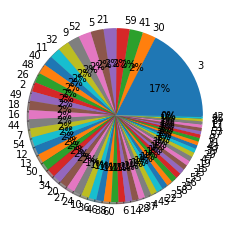

In [95]:
table_clusters_kmeans['clusters']=kmeans.labels_
table_clusters_kmeans
plt.pie(table_clusters_kmeans['clusters'].value_counts(), labels = table_clusters_kmeans['clusters'].value_counts().index.tolist(), shadow=True, autopct='%1.0f%%')
plt.show()

In [96]:
table_clusters_kmeans.shape

(50000, 2001)

In [97]:
#table_clusters_kmeans_copy = table_clusters_kmeans.copy()
#table_clusters_kmeans['clusters name'] = table_clusters_kmeans

In [100]:
table_clusters_kmeans['clusters'] = table_clusters_kmeans['clusters'].replace(0,'img')
table_clusters_kmeans

,c,work,class,id,com,string,user,tri,name,net,...,transit,school,pthread,complain,zend,asi,revis,typenam,beyond,clusters
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44
1,0.076465,0.065306,0.0,0.000000,0.0,0.435662,0.0,0.000000,0.087413,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.259164,0.000000,0.0,0.000000,0.0,0.147659,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.080493,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.100485,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44
49996,0.000000,0.000000,0.0,0.076790,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,img
49997,0.000000,0.000000,0.0,0.288317,0.0,0.077299,0.0,0.000000,0.426514,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
49998,0.240729,0.000000,0.0,0.000000,0.0,0.068578,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19


In [101]:
for j in range(0,61):
    table_clusters_kmeans['clusters'] = table_clusters_kmeans['clusters'].replace(j,dom_features_df.iloc[j].values[0])


In [102]:
table_clusters_kmeans

,c,work,class,id,com,string,user,tri,name,net,...,transit,school,pthread,complain,zend,asi,revis,typenam,beyond,clusters
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,visual
1,0.076465,0.065306,0.0,0.000000,0.0,0.435662,0.0,0.000000,0.087413,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,string
2,0.259164,0.000000,0.0,0.000000,0.0,0.147659,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.080493,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,amp
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,librari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.100485,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,visual
49996,0.000000,0.000000,0.0,0.076790,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,img
49997,0.000000,0.000000,0.0,0.288317,0.0,0.077299,0.0,0.000000,0.426514,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,list
49998,0.240729,0.000000,0.0,0.000000,0.0,0.068578,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b


In [103]:
table_clusters_kmeans['actual tags'] = tags_datas.values
table_clusters_kmeans['actual tags'] = table_clusters_kmeans['actual tags'].apply(lambda x: " ".join(x))
table_clusters_kmeans

,c,work,class,id,com,string,user,tri,name,net,...,school,pthread,complain,zend,asi,revis,typenam,beyond,clusters,actual tags
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,visual,c visual_studio
1,0.076465,0.065306,0.0,0.000000,0.0,0.435662,0.0,0.000000,0.087413,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,string,objective_c string
2,0.259164,0.000000,0.0,0.000000,0.0,0.147659,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c,objective_c
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.080493,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,amp,html
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,librari,xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.100485,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,visual,.net
49996,0.000000,0.000000,0.0,0.076790,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,img,javascript jquery image
49997,0.000000,0.000000,0.0,0.288317,0.0,0.077299,0.0,0.000000,0.426514,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,list,linq
49998,0.240729,0.000000,0.0,0.000000,0.0,0.068578,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b,regex


In [104]:
corres = []
for j in range(0,table_clusters_kmeans.shape[0]):
    if (table_clusters_kmeans['clusters'].iloc[j] in table_clusters_kmeans['actual tags'].iloc[j]) == True:
        corres.append(1)
    else:
        corres.append(0)


In [105]:
table_clusters_kmeans['correspondnace'] = corres


<AxesSubplot:>

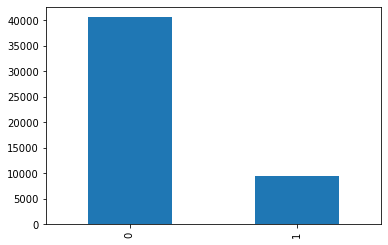

In [106]:
table_clusters_kmeans['correspondnace'].value_counts().plot.bar()

In [107]:
table_clusters_kmeans['correspondnace'] = corres

In [108]:
table_clusters_kmeans[table_clusters_kmeans['correspondnace']==1]['clusters'].drop_duplicates()

0            visual
1            string
2                 c
8               net
12           thread
13            iphon
41              sql
67          databas
75             test
79              xml
84       javascript
93             imag
108          window
122          servic
139               n
168           array
185            form
201            list
218             mvc
528               x
2536         object
3834           java
4794              b
10380            ul
19212            em
21517            id
Name: clusters, dtype: object

In [109]:
INER =[]
from sklearn.cluster import KMeans
for k in range(100,1000,100):
    kmeans=MiniBatchKMeans(n_clusters=k, random_state=0, batch_size=5000).fit(tf_idf)
    INER.append(kmeans.inertia_)
sns.pointplot(x=list(range(100,1000,100)), y=INER)
plt.show

NameError: name 'tf_idf' is not defined

In [111]:
import sklearn.metrics as metrics

model = MiniBatchKMeans(n_clusters=61, random_state=0, batch_size=5000)
model.fit(tf_idf_df)
labels = model.labels_

metrics.silhouette_score(tf_idf_df, labels)

0.020888362850255113

In [112]:
centers = model.cluster_centers_


In [113]:
kmean_centers_df=pd.DataFrame(np.asarray(centers), columns=feature_names)

## APPRENTISSAGE SUPERVISE : MULTIOUTPUT CLASSIFICATION

In [114]:
tf_idf_df


,c,work,class,id,com,string,user,tri,name,net,...,durat,transit,school,pthread,complain,zend,asi,revis,typenam,beyond
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.076465,0.065306,0.0,0.000000,0.0,0.435662,0.0,0.000000,0.087413,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.259164,0.000000,0.0,0.000000,0.0,0.147659,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.080493,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.100485,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.000000,0.000000,0.0,0.076790,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.000000,0.000000,0.0,0.288317,0.0,0.077299,0.0,0.000000,0.426514,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.240729,0.000000,0.0,0.000000,0.0,0.068578,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
tf_idf_df['tags'] = tags_datas.values
tf_idf_df

,.net,ajax,algorithm,android,angularjs,arrays,asp.net,asp.net_mvc,c,c_plus_plus11,...,templates,unit_testing,visual_studio,web_services,windows,winforms,wpf,xcode,xml,tags
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,"[c, visual_studio]"
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[objective_c, string]"
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[objective_c]
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[html]
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,[xml]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[.net]
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[javascript, jquery, image]"
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[linq]
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,[regex]


In [116]:

tf_idf_df['tags']= tf_idf_df['tags'].apply(lambda x: x.split())
tf_idf_df.head()


AttributeError: 'list' object has no attribute 'split'

In [119]:
X = tf_idf_df.loc[ : , tf_idf_df.columns != 'tags']

In [124]:
y = pd.get_dummies(tf_idf_df.tags.apply(pd.Series).stack()).sum(level=0)
y

,.net,ajax,algorithm,android,angularjs,arrays,asp.net,asp.net_mvc,c,c_plus_plus11,...,swing,templates,unit_testing,visual_studio,web_services,windows,winforms,wpf,xcode,xml
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state = 0, shuffle = False)

# Multi output KNN

## scoring functions


In [126]:
def scoring_1(ytrue,ypredictions):
    compteur = 0
    for i in range(0,ytrue.shape[0]):
        if np.array_equal(ytrue.iloc[i,:].values,ypredictions[i,:]):
            compteur=+1
    return (compteur/ytrue.shape[0])


In [199]:
def scoring_v2(y_pred,y_act):
    R = []
    for i in range(0,y_pred.shape[1]):
        R.append([i+1,classification_report(y_act.iloc[:,i],y_pred[:,i], output_dict = True)['macro avg']['precision'],classification_report(y_act.iloc[:,i],y_pred[:,i], output_dict = True)['macro avg']['recall']
                  ,classification_report(y_act.iloc[:,i],y_pred[:,i], output_dict = True)['macro avg']['f1-score']])
        R_df = pd.DataFrame(R,columns = ['tag','precison','recall','f1_score'])
    return R_df

In [128]:
def scoring(y_pred,y_act,metric,methode):
    R = []
    for i in range(0,y_pred.shape[1]):
        R.append([i+1,classification_report(y_act.iloc[:,i],y_pred[:,i], output_dict = True)[methode][metric]])
    return R

# K NN

In [129]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier

In [130]:
clf = MultiOutputClassifier(KNeighborsClassifier()).fit(x_train, y_train)


In [131]:
prediction = clf.predict(x_test)

In [132]:
prediction.shape

(16500, 60)

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
y_true  = y_test.iloc[:,0]
y_true

33500    0
33501    0
33502    0
33503    0
33504    1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: .net, Length: 16500, dtype: uint8

In [135]:
y_pred  = prediction[:,0]
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [136]:
confusion_matrix(y_true,y_pred)

array([[14163,   161],
       [ 2046,   130]], dtype=int64)

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     14324
           1       0.45      0.06      0.11      2176

    accuracy                           0.87     16500
   macro avg       0.66      0.52      0.52     16500
weighted avg       0.82      0.87      0.82     16500



In [138]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,prediction)

array([[[14163,   161],
        [ 2046,   130]],

       [[16233,     1],
        [  261,     5]],

       [[16172,    13],
        [  306,     9]],

       [[16308,     1],
        [  167,    24]],

       [[16500,     0],
        [    0,     0]],

       [[16232,    17],
        [  204,    47]],

       [[15191,    34],
        [ 1176,    99]],

       [[15851,    13],
        [  583,    53]],

       [[15800,     7],
        [  653,    40]],

       [[16485,     0],
        [   15,     0]],

       [[16225,     4],
        [  269,     2]],

       [[16179,    20],
        [  288,    13]],

       [[15987,    46],
        [  375,    92]],

       [[16118,    10],
        [  371,     1]],

       [[16274,     0],
        [  225,     1]],

       [[16130,     1],
        [  328,    41]],

       [[16278,     7],
        [  189,    26]],

       [[16408,     1],
        [   84,     7]],

       [[16332,     0],
        [  168,     0]],

       [[16366,     1],
        [  120,    13]],



In [139]:
score_test =   scoring_v2(prediction,y_test)


C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\

In [140]:
score_test.describe()['recall']['mean']

0.5468499137690543

In [141]:
score_test.describe()['f1_score']['mean']

0.5640089333580917

In [142]:
score_test.describe()['precison']['mean']


0.8047809527234048

## Logistic Regression 

In [143]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression


In [144]:
F_tags = y_train.columns.values
with open('F_tags.pk', 'wb') as fin2:
    pickle.dump(F_tags, fin2)

In [145]:
clf = MultiOutputClassifier(LogisticRegression(), n_jobs = 8).fit(x_train, y_train)


In [146]:
with open('clf.pk', 'wb') as fin2:
    pickle.dump(clf, fin2)

In [147]:
prediction = clf.predict(x_test)

In [148]:
prediction

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [149]:
from sklearn.metrics import confusion_matrix

In [150]:
y_true  = y_test.iloc[:,0]
y_true

33500    0
33501    0
33502    0
33503    0
33504    1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: .net, Length: 16500, dtype: uint8

In [151]:
y_pred  = prediction[:,0]
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [152]:
confusion_matrix(y_true,y_pred)

array([[14011,   313],
       [ 1494,   682]], dtype=int64)

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     14324
           1       0.69      0.31      0.43      2176

    accuracy                           0.89     16500
   macro avg       0.79      0.65      0.68     16500
weighted avg       0.87      0.89      0.87     16500



In [154]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,prediction)

array([[[14011,   313],
        [ 1494,   682]],

       [[16193,    41],
        [  182,    84]],

       [[16162,    23],
        [  226,    89]],

       [[16308,     1],
        [  130,    61]],

       [[16500,     0],
        [    0,     0]],

       [[16206,    43],
        [  160,    91]],

       [[15084,   141],
        [  693,   582]],

       [[15838,    26],
        [  302,   334]],

       [[15718,    89],
        [  452,   241]],

       [[16485,     0],
        [   15,     0]],

       [[16218,    11],
        [  244,    27]],

       [[16132,    67],
        [  270,    31]],

       [[15963,    70],
        [  204,   263]],

       [[16060,    68],
        [  313,    59]],

       [[16250,    24],
        [  167,    59]],

       [[16125,     6],
        [  169,   200]],

       [[16276,     9],
        [   86,   129]],

       [[16403,     6],
        [   71,    20]],

       [[16332,     0],
        [  167,     1]],

       [[16366,     1],
        [   89,    44]],



In [155]:
score_test =   scoring_v2(prediction,y_test)


C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\

In [156]:
score_test.describe()['recall']['mean']

0.6613931751712487

In [157]:
score_test.describe()['f1_score']['mean']

0.7113158662630721

In [158]:
score_test.describe()['precison']['mean']


0.8585228332582127

# Random Forrest

In [159]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier


In [160]:
clf = MultiOutputClassifier(RandomForestClassifier(max_depth=2, random_state=0,n_jobs = 8)).fit(x_train, y_train)


In [161]:
prediction = clf.predict(x_test)

In [162]:
from sklearn.metrics import confusion_matrix

In [163]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,prediction)

array([[[14324,     0],
        [ 2176,     0]],

       [[16234,     0],
        [  266,     0]],

       [[16185,     0],
        [  315,     0]],

       [[16309,     0],
        [  191,     0]],

       [[16500,     0],
        [    0,     0]],

       [[16249,     0],
        [  251,     0]],

       [[15225,     0],
        [ 1275,     0]],

       [[15864,     0],
        [  636,     0]],

       [[15807,     0],
        [  693,     0]],

       [[16485,     0],
        [   15,     0]],

       [[16229,     0],
        [  271,     0]],

       [[16199,     0],
        [  301,     0]],

       [[16033,     0],
        [  467,     0]],

       [[16128,     0],
        [  372,     0]],

       [[16274,     0],
        [  226,     0]],

       [[16131,     0],
        [  369,     0]],

       [[16285,     0],
        [  215,     0]],

       [[16409,     0],
        [   91,     0]],

       [[16332,     0],
        [  168,     0]],

       [[16367,     0],
        [  133,     0]],



In [164]:
score_test =   scoring_v2(prediction,y_test)


C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\

In [165]:
score_test.describe()['recall']['mean']

0.5166666666666667

In [166]:
score_test.describe()['f1_score']['mean']

0.5107775022466622

In [167]:
score_test.describe()['precison']['mean']

0.5051621212121212

# Logistic Regression

In [168]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression


In [169]:
clf = MultiOutputClassifier(LogisticRegression(), n_jobs = 8 ).fit(x_train, y_train)


In [170]:
prediction = clf.predict(x_test)

In [171]:
# save the model to disk
#filename = 'finalized_model.sav'
#pickle.dump(model, open(clf, 'wb'))

In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
y_test = y_test.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
x_test

,c,work,class,id,com,string,user,tri,name,net,...,durat,transit,school,pthread,complain,zend,asi,revis,typenam,beyond
0,0.000000,0.000000,0.242533,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.032297,0.081558,0.045921,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16495,0.000000,0.100485,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16496,0.000000,0.000000,0.000000,0.076790,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16497,0.000000,0.000000,0.000000,0.288317,0.0,0.077299,0.0,0.0,0.426514,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16498,0.240729,0.000000,0.000000,0.000000,0.0,0.068578,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
x_test.iloc[1000].values

array([0., 0., 0., ..., 0., 0., 0.])

In [175]:
preed = clf.predict(x_test)

In [176]:
preed[38]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [177]:
y_test_num = y_test.copy()
empty=[]
for d in range(0,y_test_num.shape[0]):
    empty.append(y_test_num.iloc[d].sum())

In [178]:
y_test_num['num of tags '] = empty
y_test_num[y_test_num['num of tags ']>1].index

Int64Index([    5,    19,    22,    38,    40,    45,    56,    59,    65,
               69,
            ...
            16452, 16454, 16479, 16484, 16486, 16489, 16490, 16494, 16496,
            16499],
           dtype='int64', length=5155)

In [179]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,prediction)

array([[[14011,   313],
        [ 1494,   682]],

       [[16193,    41],
        [  182,    84]],

       [[16162,    23],
        [  226,    89]],

       [[16308,     1],
        [  130,    61]],

       [[16500,     0],
        [    0,     0]],

       [[16206,    43],
        [  160,    91]],

       [[15084,   141],
        [  693,   582]],

       [[15838,    26],
        [  302,   334]],

       [[15718,    89],
        [  452,   241]],

       [[16485,     0],
        [   15,     0]],

       [[16218,    11],
        [  244,    27]],

       [[16132,    67],
        [  270,    31]],

       [[15963,    70],
        [  204,   263]],

       [[16060,    68],
        [  313,    59]],

       [[16250,    24],
        [  167,    59]],

       [[16125,     6],
        [  169,   200]],

       [[16276,     9],
        [   86,   129]],

       [[16403,     6],
        [   71,    20]],

       [[16332,     0],
        [  167,     1]],

       [[16366,     1],
        [   89,    44]],



In [180]:
score_test =   scoring_v2(prediction,y_test)


C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\

In [181]:
score_test.describe()['recall']['mean']

0.6613931751712487

In [182]:
score_test.describe()['f1_score']['mean']

0.7113158662630721

In [183]:
score_test.describe()['precison']['mean']

0.8585228332582127

In [184]:
score_test.describe()

,tag,precison,recall,f1_score
count,60.000000,60.000000,60.000000,60.000000
mean,30.500000,0.858523,0.661393,0.711316
std,17.464249,0.113324,0.101796,0.108199
min,1.000000,0.496757,0.499969,0.498358
25%,15.750000,0.823510,0.590697,0.639500
50%,30.500000,0.880173,0.653816,0.712836
75%,45.250000,0.927558,0.716728,0.777968
max,60.000000,1.000000,1.000000,1.000000


In [185]:
## recherche des parametres optimaux 
C=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
trace =[]
for j in C:

    clf = MultiOutputClassifier(LogisticRegression(C=j), n_jobs = 8 ).fit(x_train, y_train)
    prediction = clf.predict(x_test)
    score_test =   scoring_v2(prediction,y_test)
    trace.append([j,score_test.describe()['f1_score']['mean']])
    

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\

In [186]:
trace


[[0.001, 0.5107775022466622],
 [0.01, 0.5107775022466622],
 [0.1, 0.5575773628109686],
 [1, 0.7113158662630721],
 [10, 0.7581206630485309],
 [100, 0.7533630439662863],
 [1000, 0.7381981145674371]]

In [187]:
## recherche des parametres optimaux 
p=[ 'lbfgs', 'liblinear', 'sag', 'saga']
trace =[]
for j in p:

    clf = MultiOutputClassifier(LogisticRegression(C=10, solver = j), n_jobs = 8 ).fit(x_train, y_train)
    prediction = clf.predict(x_test)
    score_test =   scoring_v2(prediction,y_test)
    trace.append([j,score_test.describe()['f1_score']['mean']])
    

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\

In [188]:
trace


[['lbfgs', 0.7581206630485309],
 ['liblinear', 0.7581515161046654],
 ['sag', 0.7581187412043636],
 ['saga', 0.7581456325236613]]

# Gradient Boosting Clasifier

In [189]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [200]:
clf = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0)).fit(x_train, y_train)


In [201]:
prediction = clf.predict(x_test)

In [202]:
from sklearn.metrics import confusion_matrix

In [203]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test,prediction)

array([[[13741,   583],
        [ 1361,   815]],

       [[16234,     0],
        [  266,     0]],

       [[16185,     0],
        [  315,     0]],

       [[16297,    12],
        [   65,   126]],

       [[16495,     5],
        [    0,     0]],

       [[16119,   130],
        [  105,   146]],

       [[14724,   501],
        [  532,   743]],

       [[15864,     0],
        [  636,     0]],

       [[15115,   692],
        [  466,   227]],

       [[16482,     3],
        [   15,     0]],

       [[16186,    43],
        [  192,    79]],

       [[16199,     0],
        [  300,     1]],

       [[16033,     0],
        [  467,     0]],

       [[15544,   584],
        [  195,   177]],

       [[16273,     1],
        [  226,     0]],

       [[16111,    20],
        [   73,   296]],

       [[16236,    49],
        [   34,   181]],

       [[16263,   146],
        [   18,    73]],

       [[16328,     4],
        [  168,     0]],

       [[16339,    28],
        [   37,    96]],



In [204]:
score_test =   scoring_v2(prediction,y_test)


C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\

In [205]:
score_test.describe()['recall']['mean']

0.6339284479848436

In [206]:
score_test.describe()['f1_score']['mean']

0.6245832011799964

In [207]:
score_test.describe()['precison']['mean']

0.6978478399998846

In [208]:
score_test.describe()

,tag,precison,recall,f1_score
count,60.000000,60.000000,60.000000,60.000000
mean,30.500000,0.697848,0.633928,0.624583
std,17.464249,0.178996,0.151219,0.144177
min,1.000000,0.480727,0.499727,0.488681
25%,15.750000,0.496614,0.500000,0.497267
50%,30.500000,0.683490,0.548973,0.576108
75%,45.250000,0.851914,0.764349,0.735013
max,60.000000,0.992878,0.942067,0.930678


In [ ]:
raw_data.Body.values[666]